In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
data = pd.read_csv("C:/Users/pavan/jupyter/deep_learning/insurance_data.csv")
data.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [3]:
#split teh X and y features 
X = data.iloc[:,:-1]
y = data["bought_insurance"]

In [4]:
#Scale the data where age should be between 0 and 1 to match with other x feature
X_scaled = X.copy()
X_scaled["age"] = X_scaled["age"] / 100

In [5]:
X_scaled.head()

,age,affordibility
0,0.22,1
1,0.25,0
2,0.47,1
3,0.52,0
4,0.46,1


In [6]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: bought_insurance, dtype: int64

In [7]:
#train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y ,test_size = 0.2)

In [9]:
len(X_train)

22

In [10]:
len(X_test)

6

#### Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network


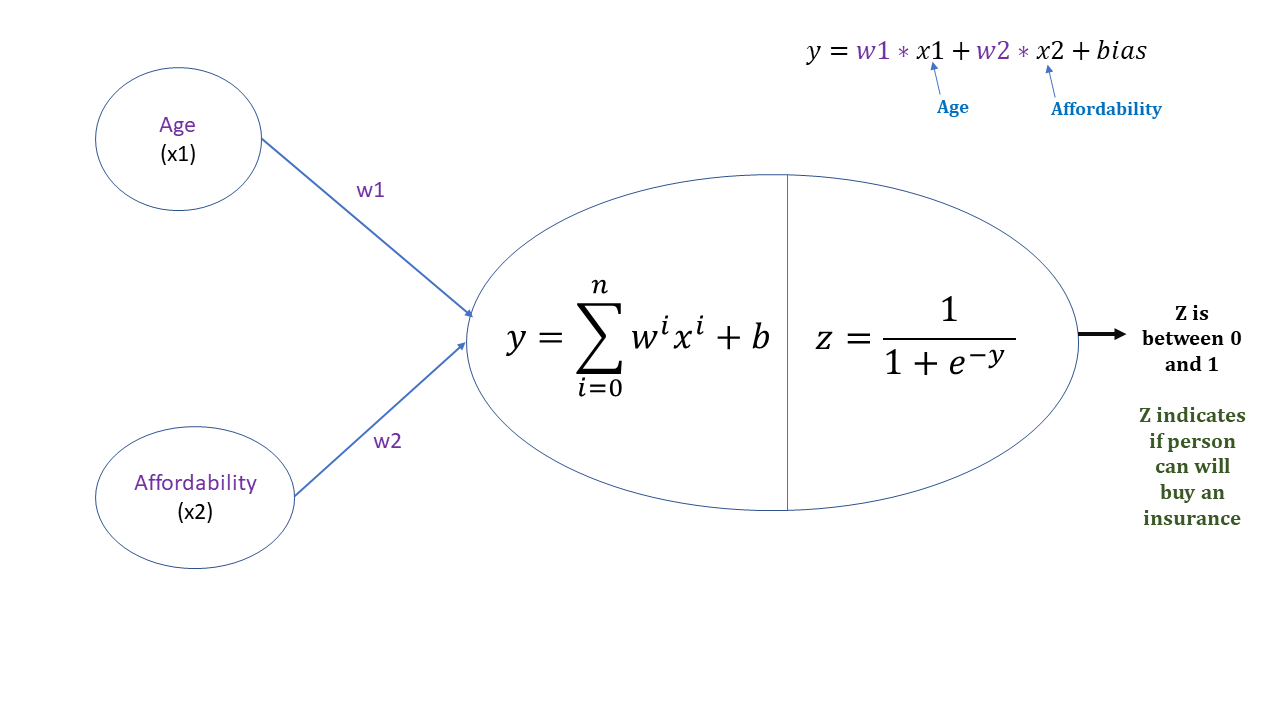

In [109]:
model1 = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=3500)

C:\Users\pavan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4545 - loss: 0.7612
Epoch 2/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.4545 - loss: 0.7607
Epoch 3/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.4545 - loss: 0.7602
Epoch 4/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4545 - loss: 0.7598
Epoch 5/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4545 - loss: 0.7593
Epoch 6/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.4545 - loss: 0.7588
Epoch 7/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.4545 - loss: 0.7583
Epoch 8/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.4545 - loss: 0.7578
Epoch 9/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.4545 - loss: 0.7574
Epoch 10/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.4545 - loss: 0.7569
Epoch 11/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.4545 - loss: 0.7564
Epoch 12/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accurac

KeyboardInterrupt: 

In [ ]:
#Evaluate the model on test set
model1.evaluate(X_test, y_test)

In [ ]:
#prediction
y_pred = model1.predict(X_test)
y_pred

In [14]:
X_test

,age,affordibility
21,0.26,0
19,0.18,1
7,0.60,0
17,0.58,1
25,0.54,1
24,0.50,1


In [15]:
y_test

21    0
19    0
7     1
17    1
25    1
24    1
Name: bought_insurance, dtype: int64

### Now get the value of weights and bias from the model

In [16]:
coef, intercept = model.get_weights()
coef, intercept

(array([[2.8432724],
        [1.3514823]], dtype=float32),
 array([-2.1194062], dtype=float32))

#### This means w1=2.2815938, w2=1.1593763, bias =-0.61464953

#### prediction using raw code rather model.predict

as above mentioned in image we need to calculate weighted_sum and sigmoid to get predictions

In [17]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))

In [18]:
def prediction_function(age, affordability):
    weighted_sum = coef[0]*age + coef[1]*affordability + intercept
    return sigmoid(weighted_sum)

In [19]:
prediction_function(0.0028,	1)

C:\Users\pavan\AppData\Local\Temp\ipykernel_9532\2829615594.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.3186543434036211

#### Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent
#### First write couple of helper routines such as sigmoid and log_loss

In [20]:
# create sigmoid function
def sigmoid_numpy(x):
    return 1/(1+np.exp(-x))

In [87]:
# create logloss function
def logloss(y_true , y_predicted):
    # print(y_predicted.shape)
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon)  for i in y_predicted] #zero values from y_predicted are near to zero now
    y_predicted_new = [min(i,1-epsilon)  for i in y_predicted_new] #one values from y_predicted are near to one now

    #convert list to numpy array
    y_predicted_new = np.array(y_predicted_new)

    #apply loglos fun
    return  -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))
    

#### equation for derivative of w1, w2 and bias

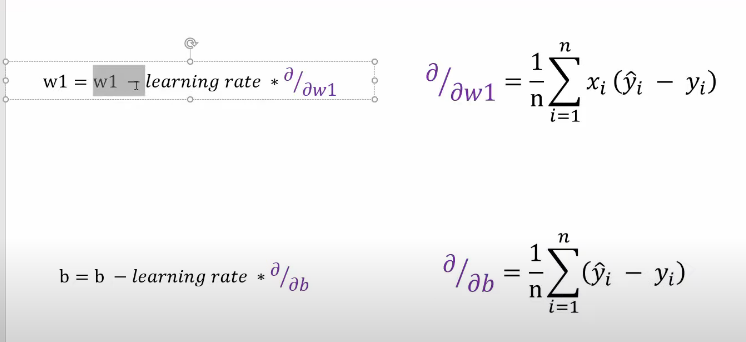

#### All right now comes the time to implement our final gradient descent function !! yay !!!

In [88]:
def gradient_descent(age, affordability,y_true, epochs, loss_treshold):
    #initialize w1, w2, bias, learning rate
    w1 = w2 = 1
    bias = 0
    learning_rate = 0.5
    n = len(age)

    #start of epochs
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = logloss(y_true, y_predicted)

        #calculte the derivative of w1, w2, bias
        w1d = (1/n)*np.dot(np.transpose(age) , (y_predicted - y_true))
        w2d = (1/n)*np.dot(np.transpose(affordability) , (y_predicted - y_true))
        bias_d = np.mean(y_predicted - y_true)

        #update the w1, w2, bias
        w1 = w1 - learning_rate * w1d
        w2 = w2 - learning_rate * w2d
        bias = bias - learning_rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss <= loss_treshold:
            break
        

    return w1, w2, bias
        
        

In [89]:
gradient_descent(X_train['age'],X_train['affordibility'],y_train,3500, 0.5110)

Epoch:0, w1:0.9649600967829428, w2:0.9307401003475301, bias:-0.13907996817828025, loss:0.761218859215241
Epoch:1, w1:0.9370247499127115, w2:0.874227185717704, bias:-0.25954587599473294, loss:0.7141407864423821
Epoch:2, w1:0.9156811019350716, w2:0.8297457178740911, bias:-0.36286120230990115, loss:0.6800624468082626
Epoch:3, w1:0.9002082792961602, w2:0.7960903716751798, bias:-0.4509777044727492, loss:0.6560041550647594
Epoch:4, w1:0.8897975614155929, w2:0.7718140431744421, bias:-0.526030580859489, loss:0.6392667962459674
Epoch:5, w1:0.8836466821767175, w2:0.7554314220730668, bias:-0.5901065357555975, loss:0.6276610877971227
Epoch:6, w1:0.8810181444534559, w2:0.7455503798272236, bias:-0.6451050364278111, loss:0.6195451835246812
Epoch:7, w1:0.8812665809294079, w2:0.740938329489371, bias:-0.6926769774369529, loss:0.6137537545148407
Epoch:8, w1:0.8838452358950742, w2:0.7405434322208118, bias:-0.7342142247014513, loss:0.6094905830165688
Epoch:9, w1:0.8883007128415926, w2:0.7434896263318864, b

(2.5884829525283815, 1.6521732100234838, -2.325840613727604)

In [90]:
coef, intercept

(array([[2.8432724],
        [1.3514823]], dtype=float32),
 array([-2.1194062], dtype=float32))

### create class for myNN mehod

In [100]:
class myNN:
    def __init__ (self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0

    #write fit method
    def fit(self,X, y , epochs,loss_treshold):
        self.w1, self.w2, self.bias = self.gradientdescent(X['age'], X['affordibility'],y, epochs, loss_treshold)

    def predict(self,X_test):
        weighted_sum = self.w1*X_test['age'] + self.w1*X_test["affordibility"] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradientdescent(self, age, affordability,y_true, epochs, loss_treshold):
        #initialize w1, w2, bias, learning rate
        w1 = w2 = 1
        bias = 0
        learning_rate = 0.5
        n = len(age)
    
        #start of epochs
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = logloss(y_true, y_predicted)
    
            #calculte the derivative of w1, w2, bias
            w1d = (1/n)*np.dot(np.transpose(age) , (y_predicted - y_true))
            w2d = (1/n)*np.dot(np.transpose(affordability) , (y_predicted - y_true))
            bias_d = np.mean(y_predicted - y_true)
    
            #update the w1, w2, bias
            w1 = w1 - learning_rate * w1d
            w2 = w2 - learning_rate * w2d
            bias = bias - learning_rate * bias_d
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
    
            if loss <= loss_treshold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break
            
    
        return w1, w2, bias
    

In [101]:
model = myNN()
model.fit(X_train,y_train,1000,0.5110)

Epoch:0, w1:0.9649600967829428, w2:0.9307401003475301, bias:-0.13907996817828025, loss:0.761218859215241
Epoch:50, w1:1.3521328227239073, w2:1.1923937823147754, bias:-1.4453350359766763, loss:0.5598852836329501
Epoch:100, w1:1.9509545773063426, w2:1.4927863704723174, bias:-1.9349292745072562, loss:0.5318460770995976
Epoch:150, w1:2.522327038202181, w2:1.640184727908057, bias:-2.28906306197987, loss:0.5127507650683971
Epoch:156, w1:2.5884829525283815, w2:1.6521732100234838, bias:-2.325840613727604, loss:0.5107860512274158


In [102]:
model.predict(X_test)

21    0.160726
19    0.674491
7     0.315884
17    0.853705
25    0.840295
24    0.825906
dtype: float64

In [ ]:
model1.predict(X_test)